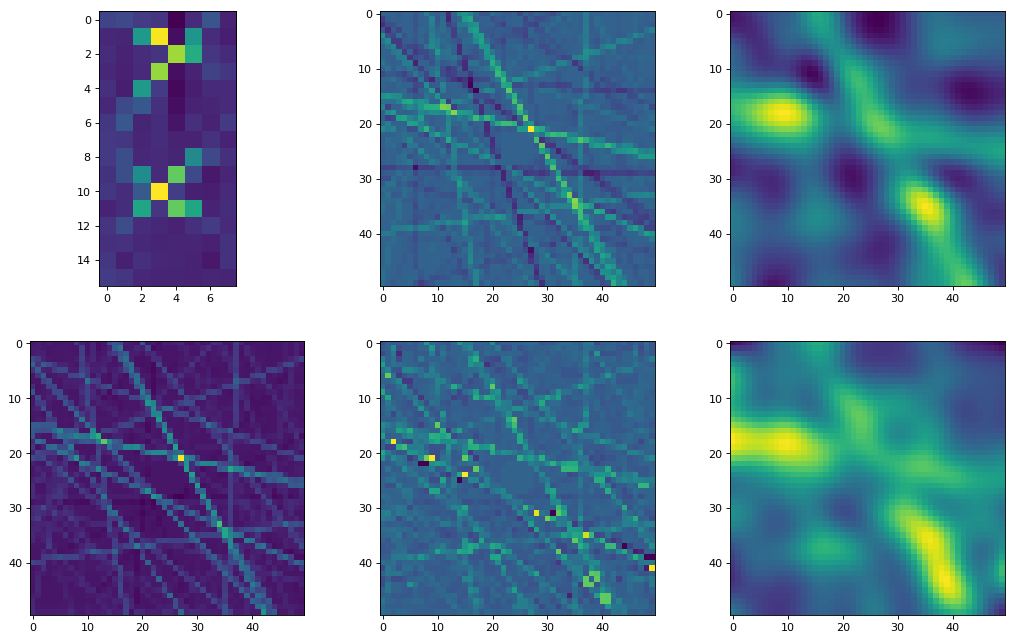

In [9]:
# Import required libraries
from image_util import *
import skimage.filters
from matplotlib import pyplot as plt
import cairocffi as cairo
import math, random
import numpy as np
import pandas as pd
from IPython.display import Image
from scipy.interpolate import interp1d
import astra

%matplotlib inline

# First, set constants and load data

# Constants
dist_d = 70/50 #(70mm)
dist_e = 95/50 #(95mm)
nviews = 16
ndetectors = 160
nvdetectors = 8

# Data
bb = pd.read_csv('12Aug_BASE_two_pens.csv')
br = pd.read_csv('12Aug_R_two_pens.csv')
readings = np.asarray(br)
base = np.asarray(bb).T
for r in range(len(readings)):
    readings[r] = readings[r]-base

# Defining distances in pixels
IMSIZE = 50
R = dist_d*IMSIZE/2
D = dist_e*IMSIZE/2

# Transforming from a round fan-beam to a fan-flat projection (See diagram)
beta = np.linspace(0, math.pi, 160)
alpha = np.asarray([R*math.sin(b-math.pi/2)/(R**2 + D**2)**0.5 for b in beta])
tau = np.asarray([(R+D)*math.tan(a) for a in alpha])

readings2 = []
tau_new = np.linspace(-(max(tau)/2), 1.3*max(tau)/2, nvdetectors) # Can change bounds. GOod to stick within max

i = 0
for r in readings:
    i += 1
    if i%2 == 0:
        f = interp1d(tau, r, kind='cubic') # Can change to linear
        readings2.append(f(tau_new))


# Reconstructing

# Defining the geometry in ASTRA
vol_geom = astra.create_vol_geom(IMSIZE, IMSIZE)
angles = np.linspace(0,2*math.pi,nviews);
d_size = (tau[-1]-tau[0])/nvdetectors
proj_geom= astra.create_proj_geom('fanflat', d_size, nvdetectors, angles, D, R);
proj_id = astra.create_projector('line_fanflat', proj_geom, vol_geom)
sinogram_id = astra.data2d.create('-sino', proj_geom, np.asarray(readings2))

# Plotting sinogram - new (transformed) set of readings
plt.figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 3, 1)
ax1.imshow(readings2) #<< Set title

# Doing the reconstruction, in this case with FBP

[bp_id, bp] = astra.create_backprojection(np.asarray(readings2), proj_id);
ax4 = plt.subplot(2, 3, 4)
ax4.imshow(bp)

rec_id = astra.data2d.create('-vol', vol_geom)

cfg = astra.astra_dict('FBP')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sinogram_id
cfg['ProjectorId'] = proj_id

# Create the algorithm object from the configuration structure
alg_id = astra.algorithm.create(cfg)

astra.algorithm.run(alg_id, 20)

# Get the result
rec = astra.data2d.get(rec_id)
ax2 = plt.subplot(2, 3, 2)
ax2.imshow(rec)
norm_rec = rec/(np.amax(rec)*2)
blurred = skimage.filters.gaussian(norm_rec, 3)
ax3 = plt.subplot(2, 3, 3)
ax3.imshow(blurred)




# A different set of recdonstruction using SIRT instead
rec_id = astra.data2d.create('-vol', vol_geom)

cfg = astra.astra_dict('SIRT')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sinogram_id
cfg['ProjectorId'] = proj_id

# Create the algorithm object from the configuration structure
alg_id = astra.algorithm.create(cfg)

astra.algorithm.run(alg_id, 20)

# Get the result
rec = astra.data2d.get(rec_id)
ax2 = plt.subplot(2, 3, 5)
ax2.imshow(rec)
norm_rec = rec/np.amax(rec)
blurred = skimage.filters.gaussian(norm_rec, 3)
ax3 = plt.subplot(2, 3, 6)
ax3.imshow(blurred)

# Clean up.
astra.algorithm.delete(alg_id)
astra.data2d.delete(rec_id)
astra.data2d.delete(sinogram_id)
astra.projector.delete(proj_id)

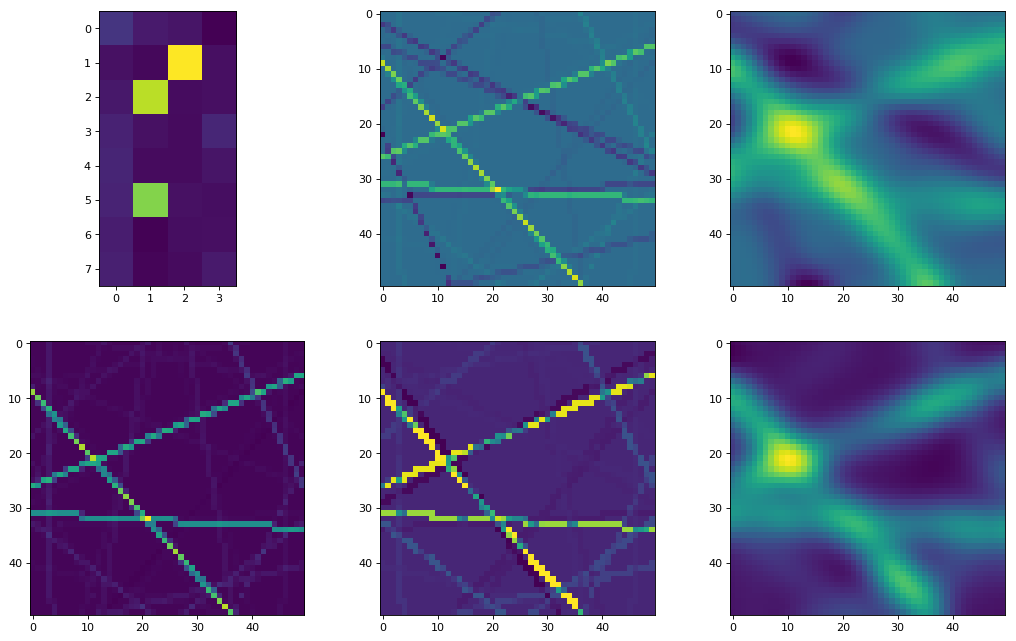

In [2]:
# Import required libraries
from image_util import *
import skimage.filters
from matplotlib import pyplot as plt
import cairocffi as cairo
import math, random
import numpy as np
import pandas as pd
from IPython.display import Image
from scipy.interpolate import interp1d
import astra

%matplotlib inline

# First, set constants and load data

# Constants
dist_d = 70/50 #(70mm)
dist_e = 95/50 #(95mm)
nviews = 8
ndetectors = 160
nvdetectors = 4

# Data
bb = pd.read_csv('12Aug_BASE_two_pens.csv')
br = pd.read_csv('12Aug_R_two_pens.csv')
readings = np.asarray(br)
base = np.asarray(bb).T
for r in range(len(readings)):
    readings[r] = readings[r]-base

# Defining distances in pixels
IMSIZE = 50
R = dist_d*IMSIZE/2
D = dist_e*IMSIZE/2

# Transforming from a round fan-beam to a fan-flat projection (See diagram)
beta = np.linspace(0, math.pi, 160)
alpha = np.asarray([R*math.sin(b-math.pi/2)/(R**2 + D**2)**0.5 for b in beta])
tau = np.asarray([(R+D)*math.tan(a) for a in alpha])

readings2 = []
tau_new = np.linspace(-(max(tau)/2), 1.3*max(tau)/2, nvdetectors) # Can change bounds. GOod to stick within max

i = 0
for r in readings:
    i += 1
    if i%4 == 2:
        f = interp1d(tau, r, kind='cubic') # Can change to linear
        readings2.append(f(tau_new))


# Reconstructing

# Defining the geometry in ASTRA
vol_geom = astra.create_vol_geom(IMSIZE, IMSIZE)
angles = np.linspace(0,2*math.pi,nviews);
d_size = (tau[-1]-tau[0])/nvdetectors
proj_geom= astra.create_proj_geom('fanflat', d_size, nvdetectors, angles, D, R);
proj_id = astra.create_projector('line_fanflat', proj_geom, vol_geom)
sinogram_id = astra.data2d.create('-sino', proj_geom, np.asarray(readings2))

# Plotting sinogram - new (transformed) set of readings
plt.figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 3, 1)
ax1.imshow(readings2) #<< Set title

# Doing the reconstruction, in this case with FBP

[bp_id, bp] = astra.create_backprojection(np.asarray(readings2), proj_id);
ax4 = plt.subplot(2, 3, 4)
ax4.imshow(bp)

rec_id = astra.data2d.create('-vol', vol_geom)

cfg = astra.astra_dict('FBP')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sinogram_id
cfg['ProjectorId'] = proj_id

# Create the algorithm object from the configuration structure
alg_id = astra.algorithm.create(cfg)

astra.algorithm.run(alg_id, 20)

# Get the result
rec = astra.data2d.get(rec_id)
ax2 = plt.subplot(2, 3, 2)
ax2.imshow(rec)
norm_rec = rec/(np.amax(rec)*2)
blurred = skimage.filters.gaussian(norm_rec, 3)
ax3 = plt.subplot(2, 3, 3)
ax3.imshow(blurred)




# A different set of recdonstruction using SIRT instead
rec_id = astra.data2d.create('-vol', vol_geom)

cfg = astra.astra_dict('SIRT')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sinogram_id
cfg['ProjectorId'] = proj_id

# Create the algorithm object from the configuration structure
alg_id = astra.algorithm.create(cfg)

astra.algorithm.run(alg_id, 20)

# Get the result
rec = astra.data2d.get(rec_id)
ax2 = plt.subplot(2, 3, 5)
ax2.imshow(rec)
norm_rec = rec/np.amax(rec)
blurred = skimage.filters.gaussian(norm_rec, 3)
ax3 = plt.subplot(2, 3, 6)
ax3.imshow(blurred)

# Clean up.
astra.algorithm.delete(alg_id)
astra.data2d.delete(rec_id)
astra.data2d.delete(sinogram_id)
astra.projector.delete(proj_id)

In [70]:
r8.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,X,Y
0,751,713,728,731,738,750,749,751,735,730,...,733,726,709,738,749,750,745,739,1.537372,2.424437
1,730,714,734,741,745,747,748,752,731,725,...,735,720,726,500,742,735,746,754,3.247863,1.492602
2,741,732,743,745,743,737,740,739,741,738,...,748,723,725,730,746,744,740,740,1.990095,3.258206
3,735,723,750,751,745,750,738,756,733,730,...,743,730,716,500,744,735,739,744,2.287863,3.805902
4,724,743,734,725,745,731,743,743,737,732,...,742,731,737,516,751,742,731,738,3.016146,2.346812


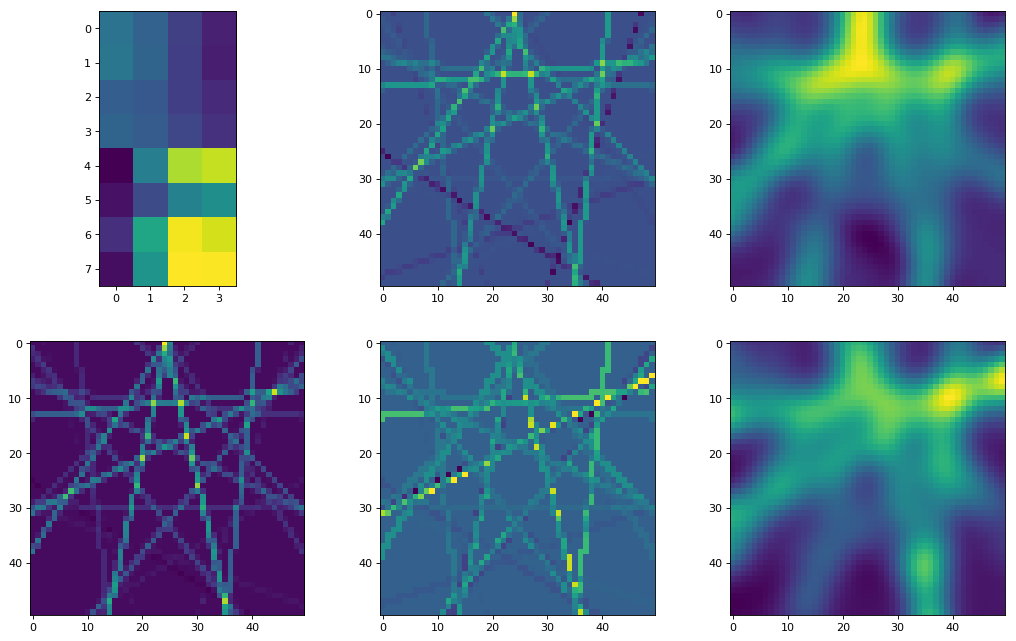

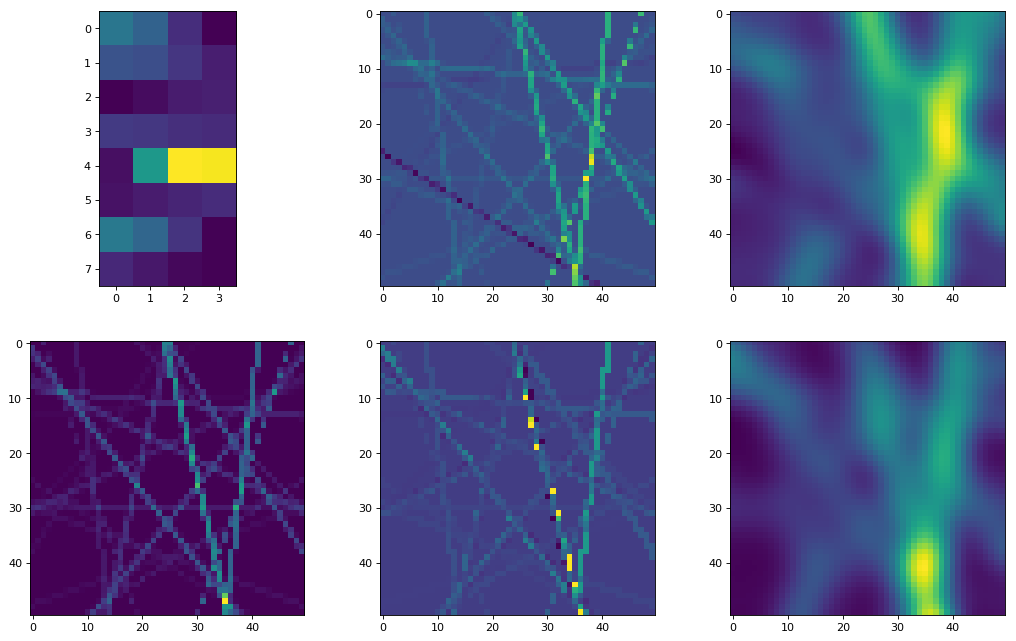

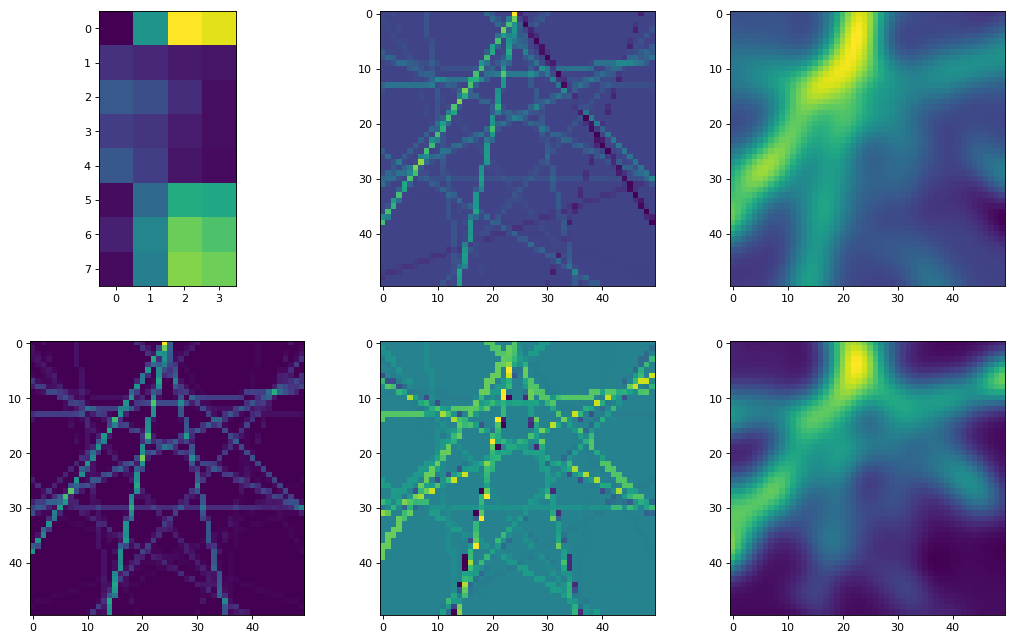

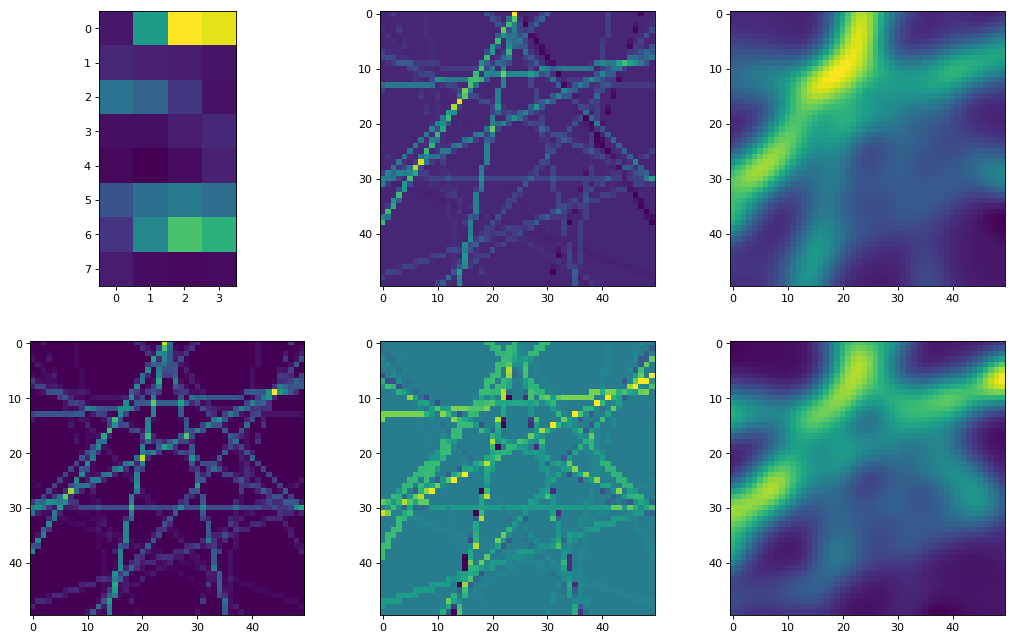

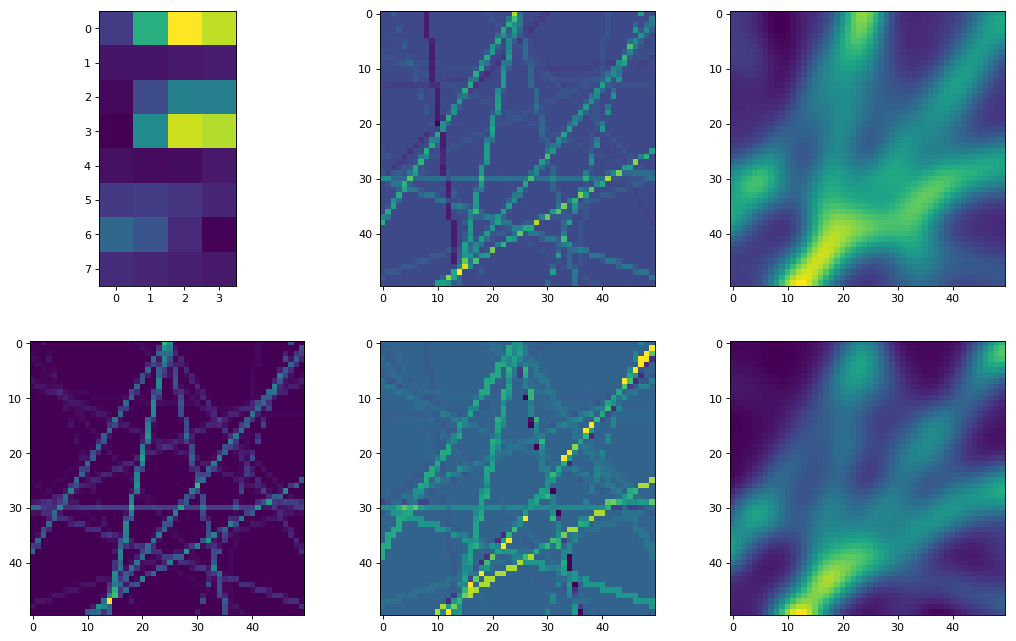

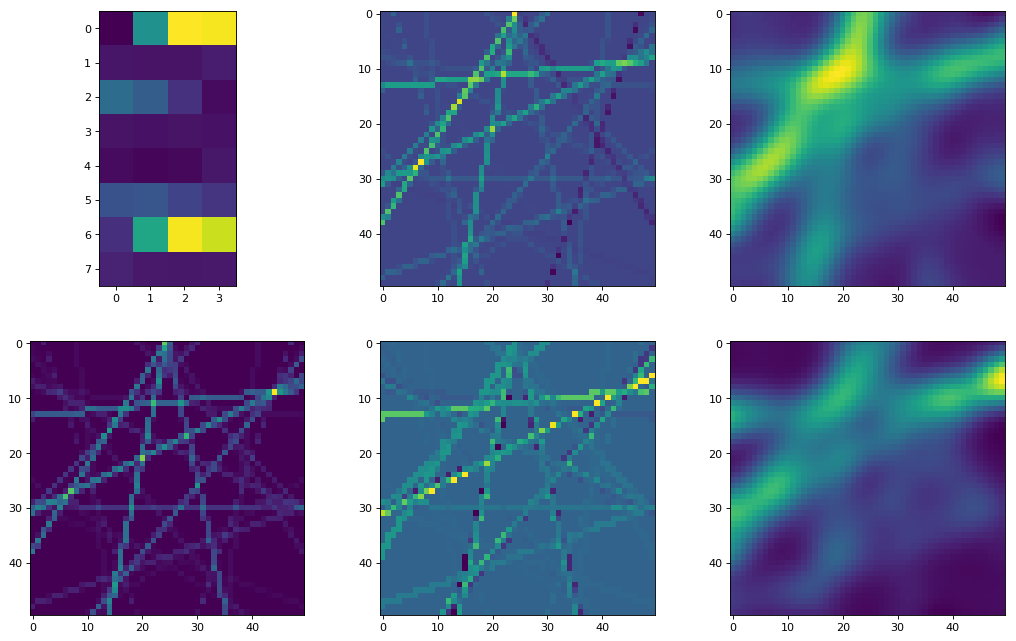

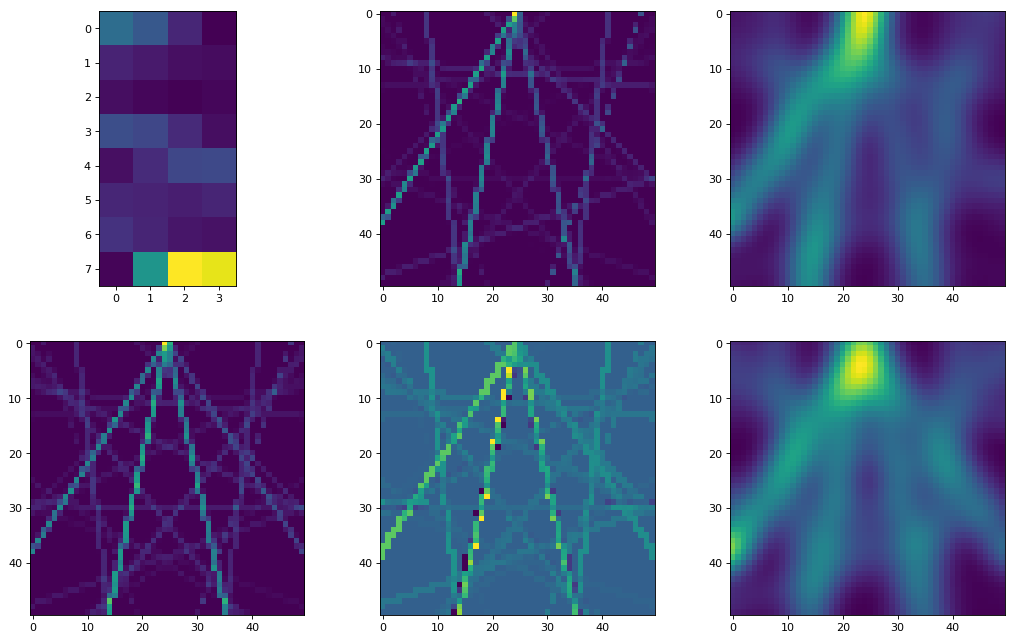

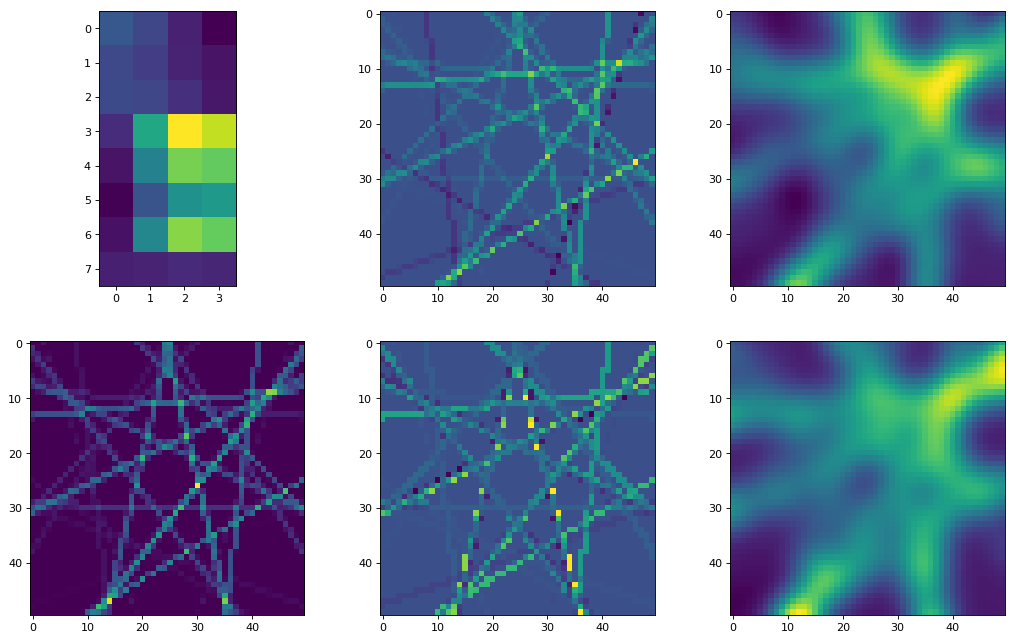

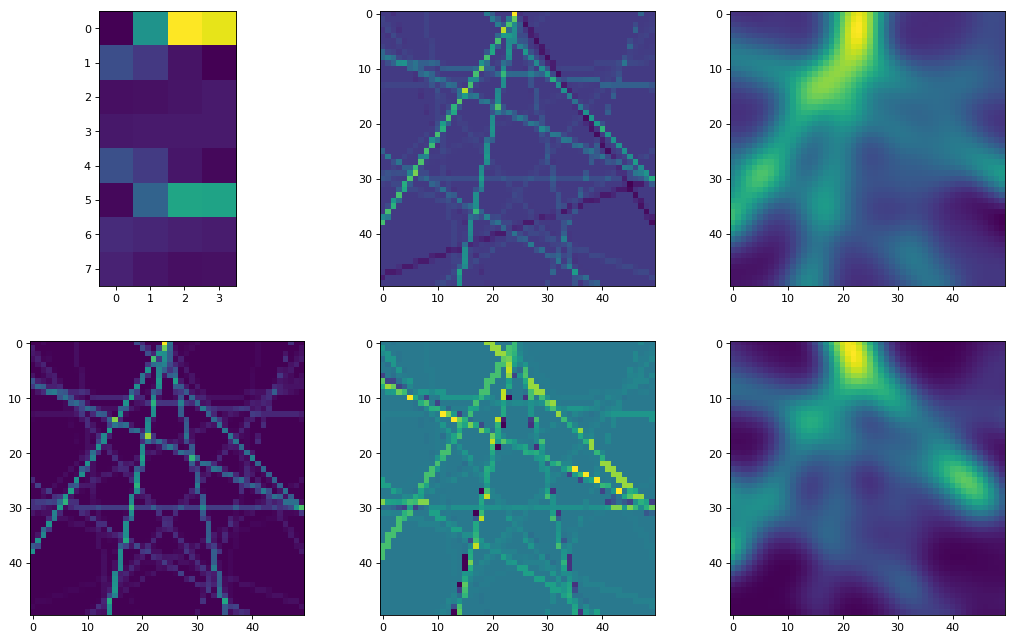

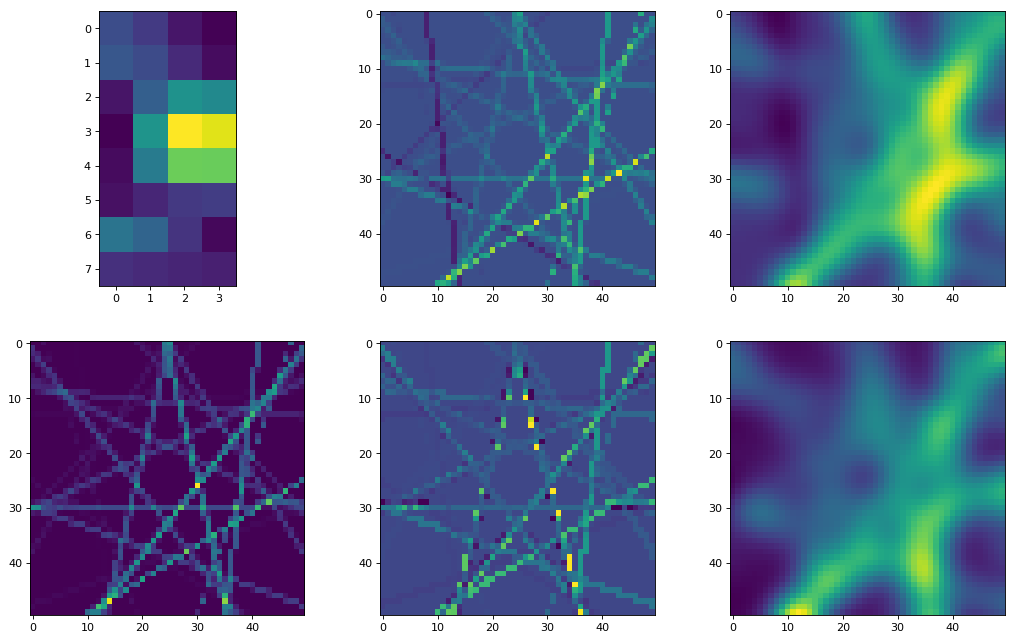

In [74]:
r8 = pd.read_csv('posinf8_500_readings.csv')
base = r8.min()[8:72]
X = r8['X'].tolist()
Y = r8['Y'].tolist()

nviews = 8
ndetectors = 4
nvdetectors = 4

IMSIZE = 50
R = IMSIZE/2
D = IMSIZE/2

# Transforming from a round fan-beam to a fan-flat projection (See diagram)
beta = np.linspace(0, math.pi, ndetectors)
alpha = np.asarray([R*math.sin(b-math.pi/2)/(R**2 + D**2)**0.5 for b in beta])
tau = np.asarray([(R+D)*math.tan(a) for a in alpha])

tau_new = np.linspace(-(max(tau)/2), 1.3*max(tau)/2, nvdetectors)

vol_geom = astra.create_vol_geom(IMSIZE, IMSIZE)
angles = np.linspace(0,2*math.pi,nviews);
d_size = (tau[-1]-tau[0])/nvdetectors
proj_geom= astra.create_proj_geom('fanflat', d_size, nvdetectors, angles, D, R);
proj_id = astra.create_projector('line_fanflat', proj_geom, vol_geom)

for i in range(10):
    readings = r8.iloc[i][8:72].tolist() # Raw readings
    readings = [readings[i] - base.tolist()[i] for i in range(len(base))] # - base
    readings = r8_to_sino(readings) # Get important ones and reorder
    
    readings2 = []
    for r in readings:
        f = interp1d(tau, r, kind='cubic') # Can change to linear
        readings2.append(f(tau_new))
        
    
    sinogram_id = astra.data2d.create('-sino', proj_geom, np.asarray(readings2))
    
    # Plotting sinogram - new (transformed) set of readings
    plt.figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
    ax1 = plt.subplot(2, 3, 1)
    ax1.imshow(readings2) #<< Set title

    # Doing the reconstruction, in this case with FBP

    [bp_id, bp] = astra.create_backprojection(np.asarray(readings2), proj_id);
    ax4 = plt.subplot(2, 3, 4)
    ax4.imshow(bp)

    rec_id = astra.data2d.create('-vol', vol_geom)

    cfg = astra.astra_dict('FBP')
    cfg['ReconstructionDataId'] = rec_id
    cfg['ProjectionDataId'] = sinogram_id
    cfg['ProjectorId'] = proj_id

    # Create the algorithm object from the configuration structure
    alg_id = astra.algorithm.create(cfg)

    astra.algorithm.run(alg_id, 20)

    # Get the result
    rec = astra.data2d.get(rec_id)
    ax2 = plt.subplot(2, 3, 2)
    ax2.imshow(rec)
    norm_rec = rec/(np.amax(rec)*2)
    blurred = skimage.filters.gaussian(norm_rec, 3)
    ax3 = plt.subplot(2, 3, 3)
    ax3.imshow(blurred)




    # A different set of recdonstruction using SIRT instead
    rec_id = astra.data2d.create('-vol', vol_geom)

    cfg = astra.astra_dict('SIRT')
    cfg['ReconstructionDataId'] = rec_id
    cfg['ProjectionDataId'] = sinogram_id
    cfg['ProjectorId'] = proj_id

    # Create the algorithm object from the configuration structure
    alg_id = astra.algorithm.create(cfg)

    astra.algorithm.run(alg_id, 20)

    # Get the result
    rec = astra.data2d.get(rec_id)
    ax2 = plt.subplot(2, 3, 5)
    ax2.imshow(rec)
    norm_rec = rec/np.amax(rec)
    blurred = skimage.filters.gaussian(norm_rec, 3)
    ax3 = plt.subplot(2, 3, 6)
    ax3.imshow(blurred)
    
    plt.savefig(str(i) + ' '+str(X[i]) + ' '+ str(Y[i])+ '.png')

# Clean up.
astra.algorithm.delete(alg_id)
astra.data2d.delete(rec_id)
astra.data2d.delete(sinogram_id)
astra.projector.delete(proj_id)

In [57]:
readings = r8.iloc[1][8:72].tolist()
np.asarray(readings).reshape(8, 8)

array([[731., 725., 730., 749., 476., 743., 740., 730.],
       [739., 723., 736., 730., 729., 747., 743., 742.],
       [734., 712., 727., 729., 736., 685., 624., 739.],
       [752., 710., 727., 729., 736., 744., 722., 490.],
       [739., 722., 733., 737., 733., 742., 747., 709.],
       [695., 584., 731., 743., 745., 747., 732., 741.],
       [740., 716., 532., 722., 759., 737., 735., 744.],
       [735., 720., 726., 500., 742., 735., 746., 754.]])

In [63]:
readings = [readings[i] - base.tolist()[i] for i in range(len(base))]

In [64]:
def r8_to_sino(readings):
    sino = []
    for e in range(8):
        start = e*8 + (e+2)%8
        end = e*8 + (e+6)%8
        if end-start == 4:
            sino.append(readings[start : end])
        else:
            r = readings[start : (e+1)*8]
            for p in readings[e*8 : end]:
                r.append(p)
            sino.append(r)
    return np.asarray(sino)

readings = r8_to_sino(readings)


In [65]:
readings

array([[ 21.,  86.,  20.,  22.],
       [ 19.,  60.,  32.,  26.],
       [ 12.,   9.,  25.,  17.],
       [ 27.,  42.,  33.,  38.],
       [ 34.,  30., 221.,  40.],
       [ 14.,  19.,  31.,  35.],
       [ 29.,  88.,  23.,  12.],
       [ 38.,  29.,  10.,  14.]])

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


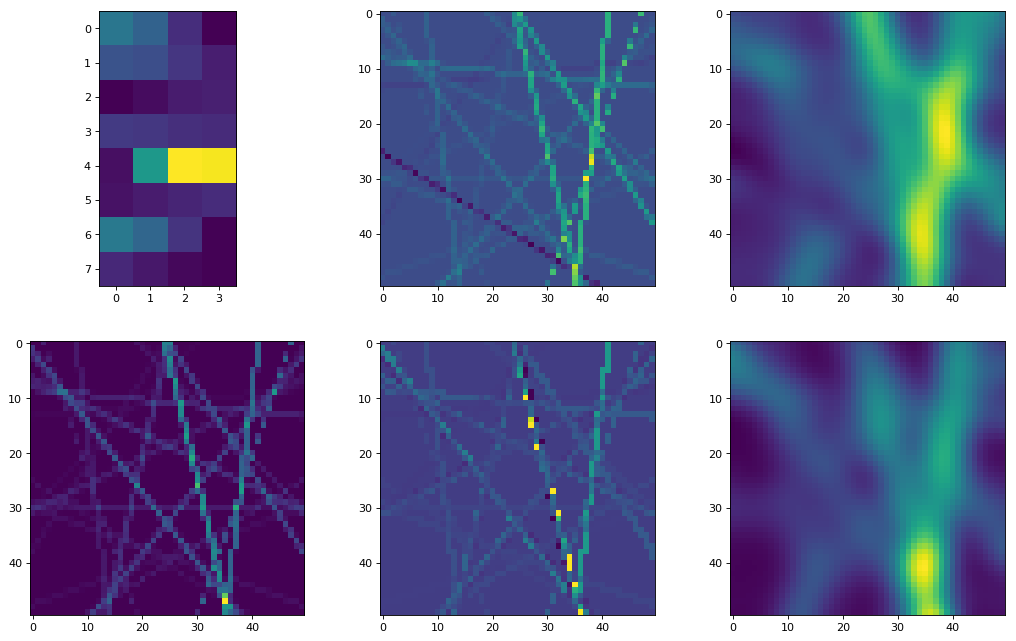

In [67]:
# Import required libraries
from image_util import *
import skimage.filters
from matplotlib import pyplot as plt
import cairocffi as cairo
import math, random
import numpy as np
import pandas as pd
from IPython.display import Image
from scipy.interpolate import interp1d
import astra

%matplotlib inline

# First, set constants and load data

# Constants
dist_d = 50/50 
dist_e = 50/50
nviews = 8
ndetectors = 4
nvdetectors = 4

# Defining distances in pixels
IMSIZE = 50
R = dist_d*IMSIZE/2
D = dist_e*IMSIZE/2

# Transforming from a round fan-beam to a fan-flat projection (See diagram)
beta = np.linspace(0, math.pi, ndetectors)
alpha = np.asarray([R*math.sin(b-math.pi/2)/(R**2 + D**2)**0.5 for b in beta])
tau = np.asarray([(R+D)*math.tan(a) for a in alpha])

readings2 = []
tau_new = np.linspace(-(max(tau)/2), 1.3*max(tau)/2, nvdetectors) # Can change bounds. GOod to stick within max

i = 0
for r in readings:
    print(len(tau))
    print(len(r))
    f = interp1d(tau, r, kind='cubic') # Can change to linear
    readings2.append(f(tau_new))


# Reconstructing

# Defining the geometry in ASTRA
vol_geom = astra.create_vol_geom(IMSIZE, IMSIZE)
angles = np.linspace(0,2*math.pi,nviews);
d_size = (tau[-1]-tau[0])/nvdetectors
proj_geom= astra.create_proj_geom('fanflat', d_size, nvdetectors, angles, D, R);
proj_id = astra.create_projector('line_fanflat', proj_geom, vol_geom)
sinogram_id = astra.data2d.create('-sino', proj_geom, np.asarray(readings2))

# Plotting sinogram - new (transformed) set of readings
plt.figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 3, 1)
ax1.imshow(readings2) #<< Set title

# Doing the reconstruction, in this case with FBP

[bp_id, bp] = astra.create_backprojection(np.asarray(readings2), proj_id);
ax4 = plt.subplot(2, 3, 4)
ax4.imshow(bp)

rec_id = astra.data2d.create('-vol', vol_geom)

cfg = astra.astra_dict('FBP')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sinogram_id
cfg['ProjectorId'] = proj_id

# Create the algorithm object from the configuration structure
alg_id = astra.algorithm.create(cfg)

astra.algorithm.run(alg_id, 20)

# Get the result
rec = astra.data2d.get(rec_id)
ax2 = plt.subplot(2, 3, 2)
ax2.imshow(rec)
norm_rec = rec/(np.amax(rec)*2)
blurred = skimage.filters.gaussian(norm_rec, 3)
ax3 = plt.subplot(2, 3, 3)
ax3.imshow(blurred)




# A different set of recdonstruction using SIRT instead
rec_id = astra.data2d.create('-vol', vol_geom)

cfg = astra.astra_dict('SIRT')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sinogram_id
cfg['ProjectorId'] = proj_id

# Create the algorithm object from the configuration structure
alg_id = astra.algorithm.create(cfg)

astra.algorithm.run(alg_id, 20)

# Get the result
rec = astra.data2d.get(rec_id)
ax2 = plt.subplot(2, 3, 5)
ax2.imshow(rec)
norm_rec = rec/np.amax(rec)
blurred = skimage.filters.gaussian(norm_rec, 3)
ax3 = plt.subplot(2, 3, 6)
ax3.imshow(blurred)

# Clean up.
astra.algorithm.delete(alg_id)
astra.data2d.delete(rec_id)
astra.data2d.delete(sinogram_id)
astra.projector.delete(proj_id)

In [ ]:
es = []
ds = []

off = 7*math.pi/8 # Found iteratively. Can refine

for i in range(8):
    d = {
        'r':1, # Distance from center relative to furthest object
        'a':off - math.pi*(i+0.5)/4, #2*math.pi*i/8,
    }
    e = {
        'r':1, # Distance from center relative to furthest object
        'a':off - math.pi*(i)/4, #2*math.pi*i/8,
    }
    ds.append(d)
    es.append(e)
